In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

## Nan 데이터 확인

In [2]:
df = pd.read_csv("data/customerRegressionFull.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         13000 non-null  int64  
 1   Computer    13000 non-null  int64  
 2   TV          13000 non-null  int64  
 3   Cellphone   13000 non-null  int64  
 4   Software    13000 non-null  int64  
 5   Frequency3  13000 non-null  int64  
 6   Monetary3   13000 non-null  float64
 7   Monetary60  13000 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 812.6 KB


In [3]:
df.head(5)

,age,Computer,TV,Cellphone,Software,Frequency3,Monetary3,Monetary60
0,37,4,1,0,2,7,1.607621e+06,3.220018e+06
1,21,4,1,1,1,7,1.654844e+06,4.792484e+06
2,20,1,2,2,1,6,1.884846e+06,4.681646e+06
3,11,0,3,0,2,5,1.415478e+06,5.861252e+06
4,17,0,2,1,0,3,1.669848e+06,3.914121e+06


## train / valid / test 분할
- 7 : 2 : 1 의 비율로 분할하였음

In [4]:
x = df[["age", "Computer", "TV", "Cellphone", "Software", "Frequency3", "Monetary3"]]
y = df[["Monetary60"]]

In [5]:
df_train = df.iloc[0:int(len(df) * 0.9)]
#df_valid = df.iloc[int(len(df) * 0.7):int(len(df) * 0.9)]
df_test = df.iloc[int(len(df) * 0.9):]

In [6]:
print(len(df_train), len(df_test))

11700 1300


In [7]:
x_train = df_train[["age", "Computer", "TV", "Cellphone", "Software", "Frequency3", "Monetary3"]]
y_train = df_train[["Monetary60"]]

x_test = df_test[["age", "Computer", "TV", "Cellphone", "Software", "Frequency3", "Monetary3"]]
y_test = df_test[["Monetary60"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd53a811278>,
      dtype=object)

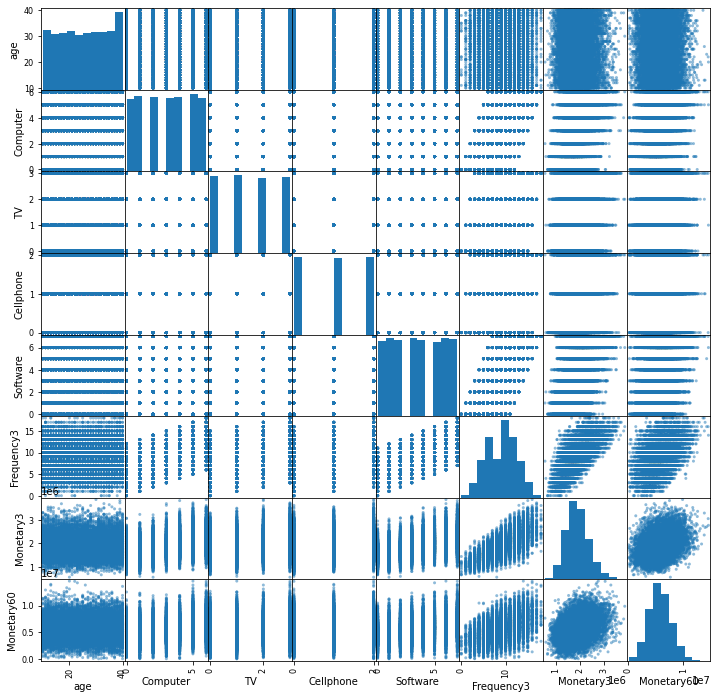

In [8]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(12, 12))

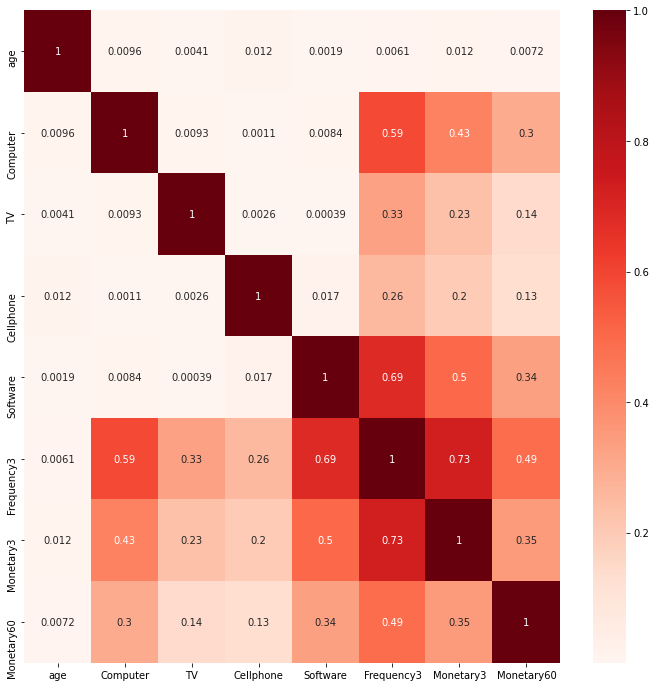

In [9]:
import seaborn as sns

plt.figure(figsize=(12, 12))
cor = df.corr()
sns.heatmap(abs(cor), annot=True, cmap=plt.cm.Reds)
plt.show()

## VIF 확인

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(inputs):
    
    vif = pd.DataFrame()
    vif["variables"] = inputs.columns
    vif["VIF"] = [variance_inflation_factor(inputs.values, i) for i in range(inputs.shape[1])]
    
    return vif

In [11]:
calc_vif(df)

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,age,6.538816
1,Computer,inf
2,TV,inf
3,Cellphone,inf
4,Software,inf
5,Frequency3,inf
6,Monetary3,25.514550
7,Monetary60,10.524712


In [12]:
calc_vif(df.drop(["Monetary60"], axis=1))

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,age,6.273384
1,Computer,inf
2,TV,inf
3,Cellphone,inf
4,Software,inf
5,Frequency3,inf
6,Monetary3,24.175428


In [13]:
x = df.drop(["Monetary60"],axis=1)
y = df["Monetary60"]
X = sm.add_constant(x)

model = sm.OLS(y, X).fit()
print(model.pvalues)
for i in range(len(model.pvalues)):
    if model.pvalues[i] == max(model.pvalues):
        print("\n", i)
        print("\n", max(model.pvalues))
        break

const         1.029351e-304
age            5.986434e-01
Computer       5.591647e-21
TV             1.349628e-02
Cellphone      4.367822e-06
Software       3.133203e-17
Frequency3    9.422394e-283
Monetary3      3.766259e-01
dtype: float64

 1

 0.598643401545069


In [14]:
X = X.drop(["age"],axis=1)
model=sm.OLS(y, X).fit()
print(model.pvalues)
for i in range(len(model.pvalues)):
    if model.pvalues[i] == max(model.pvalues):
        print("\n", i)
        print("\n", max(model.pvalues))
        break

const          0.000000e+00
Computer       5.522016e-21
TV             1.367830e-02
Cellphone      4.237460e-06
Software       3.255625e-17
Frequency3    8.939048e-283
Monetary3      3.796395e-01
dtype: float64

 6

 0.37963952619897057


In [15]:
X = X.drop(["const"],axis=1)

In [16]:
calc_vif(X)

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Computer,inf
1,TV,inf
2,Cellphone,inf
3,Software,inf
4,Frequency3,inf
5,Monetary3,18.162812


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, X, y, cv=5, scoring="neg_mean_absolute_error")

scores

array([-1424817.33898606, -1407448.49830213, -1399703.08535858,
       -1436510.55434937, -1349406.02121324])

In [18]:
scores.mean()

-1403577.0996418763